In [ ]:
!pip install zstandard jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zstandard as zstd
import jsonlines
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline

In [ ]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [ ]:
# Open the compressed file for reading
with open('sample_data/africa+climate.comments.jsonl.zst', 'rb') as fh:

    # Create a Zstd decompressor
    dctx = zstd.ZstdDecompressor()

    # Create a decompression stream for the compressed file
    stream_reader = dctx.stream_reader(fh)

    # Read the entire file as bytes
    file_bytes = stream_reader.read()

    # Decode the bytes to a string
    file_str = file_bytes.decode('utf-8')

    # Create an empty list to store the dictionaries
    data = []

    # Open the JSON lines file for reading
    with jsonlines.Reader(file_str.splitlines()) as reader:

        # Iterate over each JSON object in the file
        for obj in reader:
            # Append the object to the list
            data.append(obj)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,media_metadata,author_created_utc,author_cakeday,awarders,can_mod_post,quarantined,approved_at_utc,steward_reports,rte_mode,banned_at_utc
0,stansburywhore,None,None,I'll start off by saying that I agree that cli...,True,0,1494892610,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,melonlorde,None,None,Lots of possible reasons...\n\n1. We out-compe...,True,0,1494885459,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,predalienmack,None,None,"Well 150 years ago, currencies were valued qui...",True,0,1494884307,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TheChosenDrone,None,None,You say that even as the evidence to the contr...,True,0,1494883176,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FlyingFoxOfTheYard_,None,38∆,"&gt; Savages, non-civilized peoples so Africa,...",True,0,1494882907,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check if there is collapse among the subreddit

df['subreddit'].value_counts()

worldnews                 5615
AskReddit                 2848
europe                    1983
collapse                  1938
politics                  1725
                          ... 
u_PeterExplainsTheJoke       1
KCcirclejerk                 1
AmericanPolitics             1
tooktoomuch                  1
Solar_System                 1
Name: subreddit, Length: 5222, dtype: int64

In [ ]:
# Extract only r/collapse data
collapse_df = df[df['subreddit'] == 'collapse'].reset_index()

In [ ]:
collapse_df.head()

,index,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,media_metadata,author_created_utc,author_cakeday,awarders,can_mod_post,quarantined,approved_at_utc,steward_reports,rte_mode,banned_at_utc
0,141,johnsmith66,None,None,&gt;How would that made you feel? Wold you fee...,True,0,1494260674,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,171,Elukka,None,None,Africans are already emitting quite a bit of d...,True,0,1494045332,None,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,384,humanefly,None,None,"Also, when I said tropics, I was using the mea...",NaN,0,1427389647,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,470,autowikibot,None,None,#####&amp;#009;\n\n######&amp;#009;\n\n####&am...,NaN,0,1426598609,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,559,Isnoy,None,None,"\n&gt;First, I'm not talking about emission on...",True,0,1668538662,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del collapse_df['index']

In [ ]:
collapse_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,media_metadata,author_created_utc,author_cakeday,awarders,can_mod_post,quarantined,approved_at_utc,steward_reports,rte_mode,banned_at_utc
0,johnsmith66,None,None,&gt;How would that made you feel? Wold you fee...,True,0,1494260674,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Elukka,None,None,Africans are already emitting quite a bit of d...,True,0,1494045332,None,True,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,humanefly,None,None,"Also, when I said tropics, I was using the mea...",NaN,0,1427389647,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,autowikibot,None,None,#####&amp;#009;\n\n######&amp;#009;\n\n####&am...,NaN,0,1426598609,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Isnoy,None,None,"\n&gt;First, I'm not talking about emission on...",True,0,1668538662,None,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract the relevant columns and rename the column
df = collapse_df[['created_utc', 'body']]

In [ ]:
df.head()

,created_utc,body
0,1494260674,&gt;How would that made you feel? Wold you fee...
1,1494045332,Africans are already emitting quite a bit of d...
2,1427389647,"Also, when I said tropics, I was using the mea..."
3,1426598609,#####&amp;#009;\n\n######&amp;#009;\n\n####&am...
4,1668538662,"\n&gt;First, I'm not talking about emission on..."


In [ ]:
# Convert the 'created_utc' column to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [ ]:
df.head()

,created_utc,body
0,2017-05-08 16:24:34,&gt;How would that made you feel? Wold you fee...
1,2017-05-06 04:35:32,Africans are already emitting quite a bit of d...
2,2015-03-26 17:07:27,"Also, when I said tropics, I was using the mea..."
3,2015-03-17 13:23:29,#####&amp;#009;\n\n######&amp;#009;\n\n####&am...
4,2022-11-15 18:57:42,"\n&gt;First, I'm not talking about emission on..."


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def cleaned_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove "amp009"
    tokens = [token.replace("amp009", "") for token in tokens]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [ ]:
df['cleaned_body'] = df['body'].apply(cleaned_text)

In [ ]:
df.head()

,created_utc,body,cleaned_body
0,2017-05-08 16:24:34,&gt;How would that made you feel? Wold you fee...,gthow would made feel wold feel disappointed p...
1,2017-05-06 04:35:32,Africans are already emitting quite a bit of d...,african already emitting quite bit direct indi...
2,2015-03-26 17:07:27,"Also, when I said tropics, I was using the mea...",also said tropic using meaning sense tropical ...
3,2015-03-17 13:23:29,#####&amp;#009;\n\n######&amp;#009;\n\n####&am...,water scarcityhttpsenwikipediaorgwikiwater2...
4,2022-11-15 18:57:42,"\n&gt;First, I'm not talking about emission on...",gtfirst im talking emission factor consider im...


In [ ]:
# Set the 'created_utc' column as the index
df.set_index('created_utc', inplace=True)

In [ ]:
# Resample the data to get the count of posts per month instead of the day the other guy used which made it clustered
posts_per_month = df.resample('M').size()

# **THE MAIN ANALYSIS**

## 1. Posts counts over time using period as month

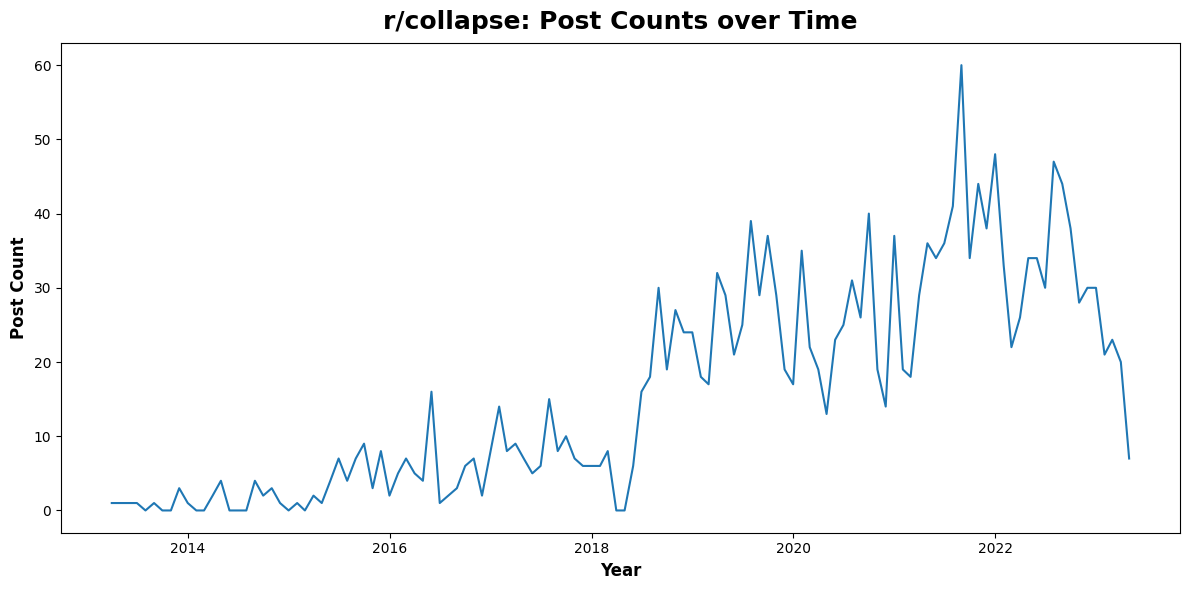

In [ ]:
# Plot the post counts over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=posts_per_month)
plt.title('r/collapse: Post Counts over Time')
plt.xlabel('Year')
plt.ylabel('Post Count')
plt.show()

Bar chat equivalent

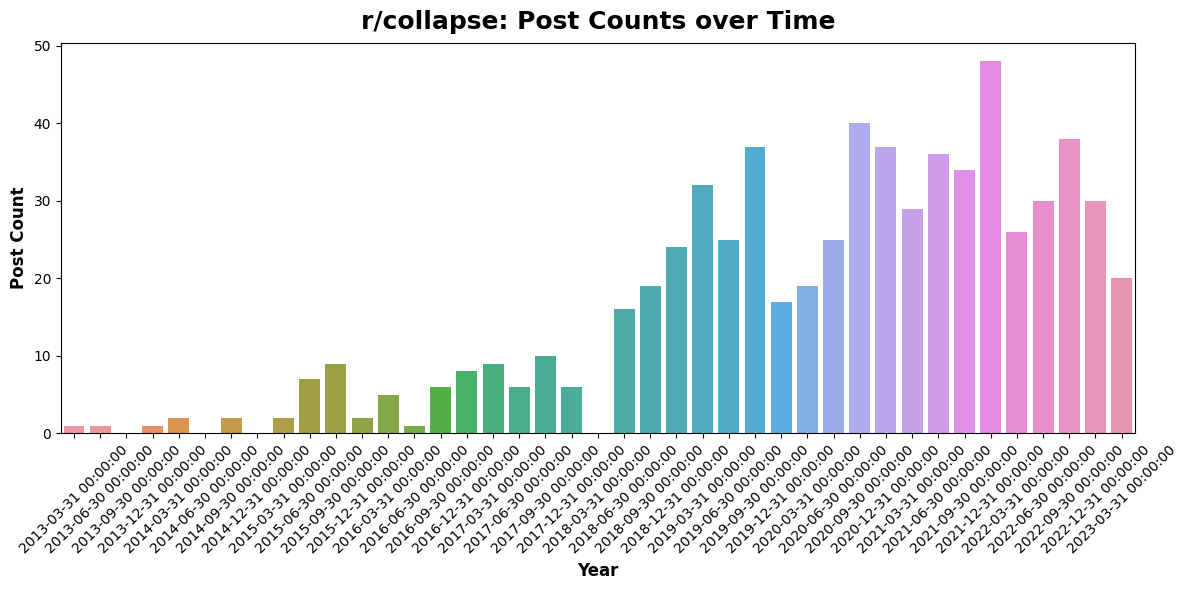

In [ ]:
# Plot the post counts over time as a bar chart
plt.figure(figsize=(12, 6))
subset_index = posts_per_month.index[::3]  # Subset every 3rd index label to avoid clustered unreadable labels
sns.barplot(x=subset_index, y=posts_per_month.loc[subset_index].values)
plt.title('r/collapse: Post Counts over Time')
plt.xlabel('Year')
plt.ylabel('Post Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## 2. Sentiment Analysis - Distribution of sentiment specifically for r/collapse subreddit

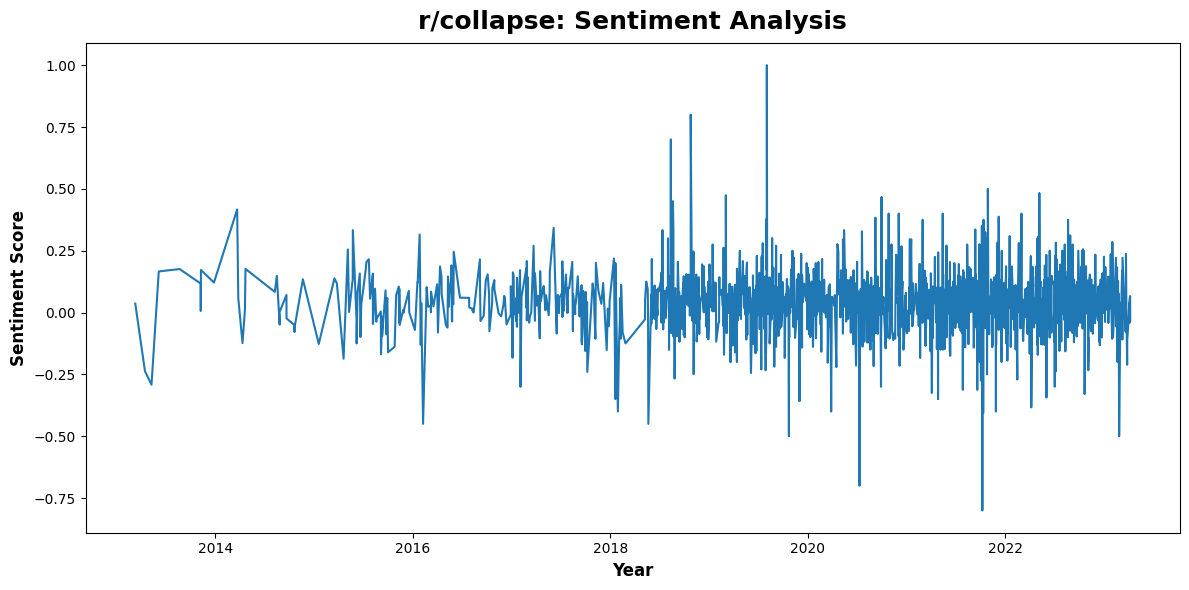

In [ ]:
from textblob import TextBlob

# Apply sentiment analysis to the 'body' column
df['sentiment'] = df['cleaned_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment scores over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='created_utc', y='sentiment')
plt.title('r/collapse: Sentiment Analysis')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.show()


## 3. Word Frequency - most frequently used word

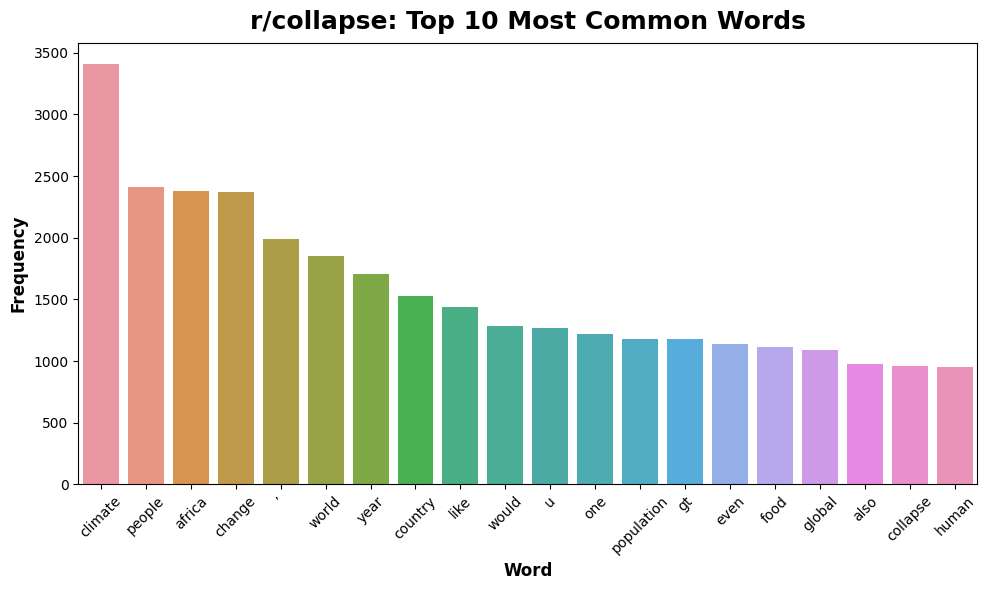

In [ ]:
from collections import Counter

# Concatenate all comments into a single string
all_comments = ' '.join(df['cleaned_body'])

# Tokenize the comments
tokens = word_tokenize(all_comments.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

# Get word frequencies
word_freq = Counter(tokens)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Plot the word frequencies as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('r/collapse: Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## 4. Comment Length Analysis - Understanding how comments are distributed according to how many characters

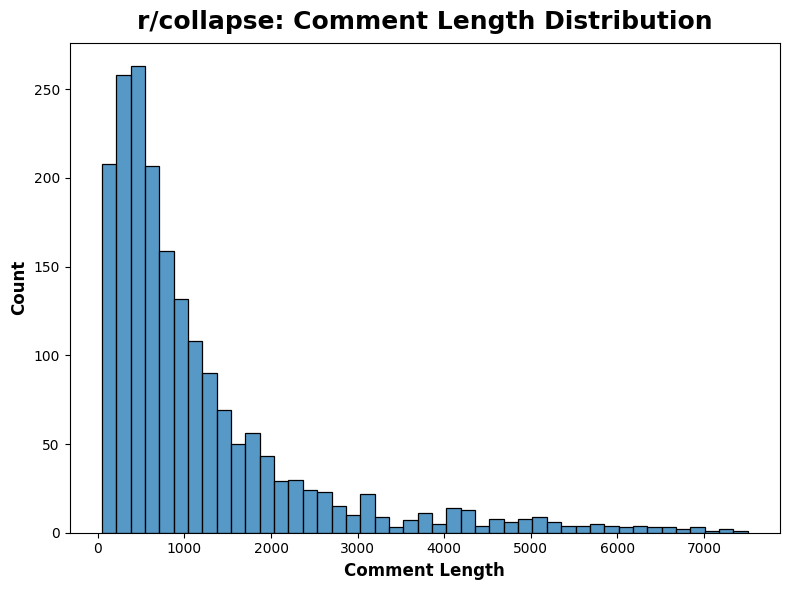

In [ ]:
# Calculate the length of each comment
df['comment_length'] = df['cleaned_body'].apply(len)

# Plot the comment length distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='comment_length')
plt.title('r/collapse: Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()


## 5. Time of the day Analysis - which time do people generally comment more at

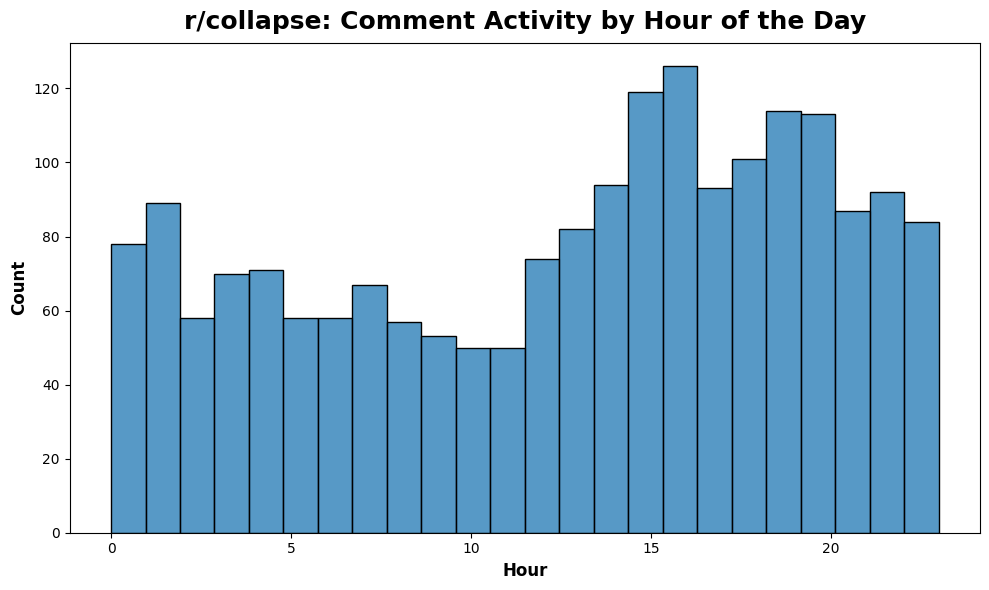

In [ ]:
# Extract the hour of the day from the index (created_utc)
df['hour'] = df.index.hour

# Plot the distribution of comments by hour
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hour', bins=24)
plt.title('r/collapse: Comment Activity by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

## 6. Comment Word Cloud - Most frequently used words in comments

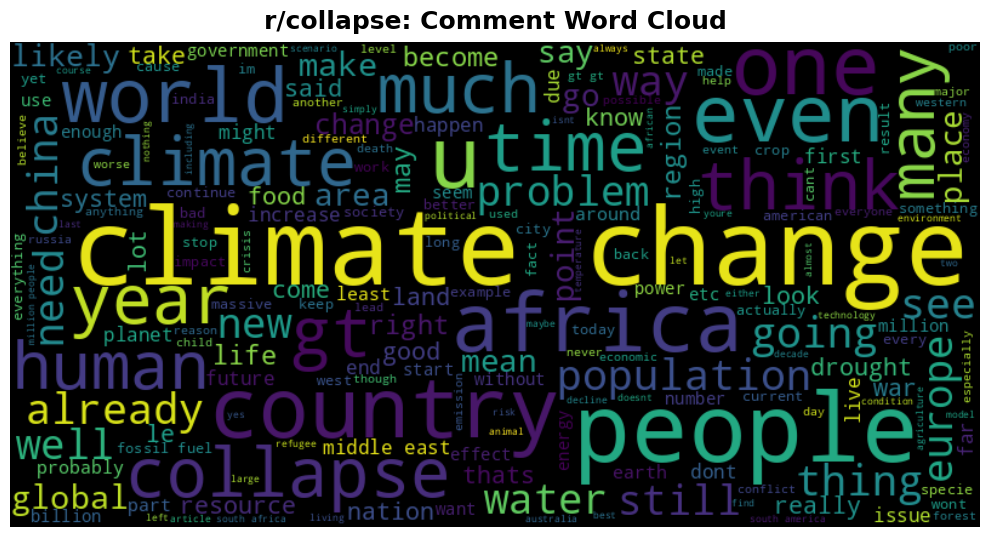

In [ ]:
from wordcloud import WordCloud

# Concatenate all comments into a single string
all_comments = ' '.join(df['cleaned_body'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('r/collapse: Comment Word Cloud')
plt.show()


# END